In [628]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [629]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [630]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
    'oldpeak', 'slope', 'ca', 'thal', 'target'
]

try:
    heart_df = pd.read_csv(url, names=columns)
    print("✅ Dataset loaded successfully!")
except Exception as e:
    print(f"❌ Error loading dataset: {e}")
    exit()


✅ Dataset loaded successfully!


In [631]:
heart_df.head(25)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [632]:
# cleaning
heart_df.replace('?', np.nan, inplace=True)
for col in ['ca', 'thal']:
    heart_df[col] = pd.to_numeric(heart_df[col], errors='coerce')

heart_df.fillna(heart_df.median(), inplace=True)

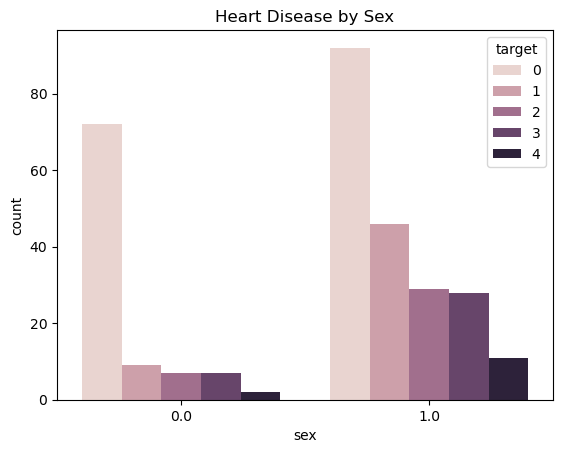

In [633]:
# Sex vs Target
sns.countplot(x='sex', hue='target', data=heart_df)
plt.title('Heart Disease by Sex')
plt.show()

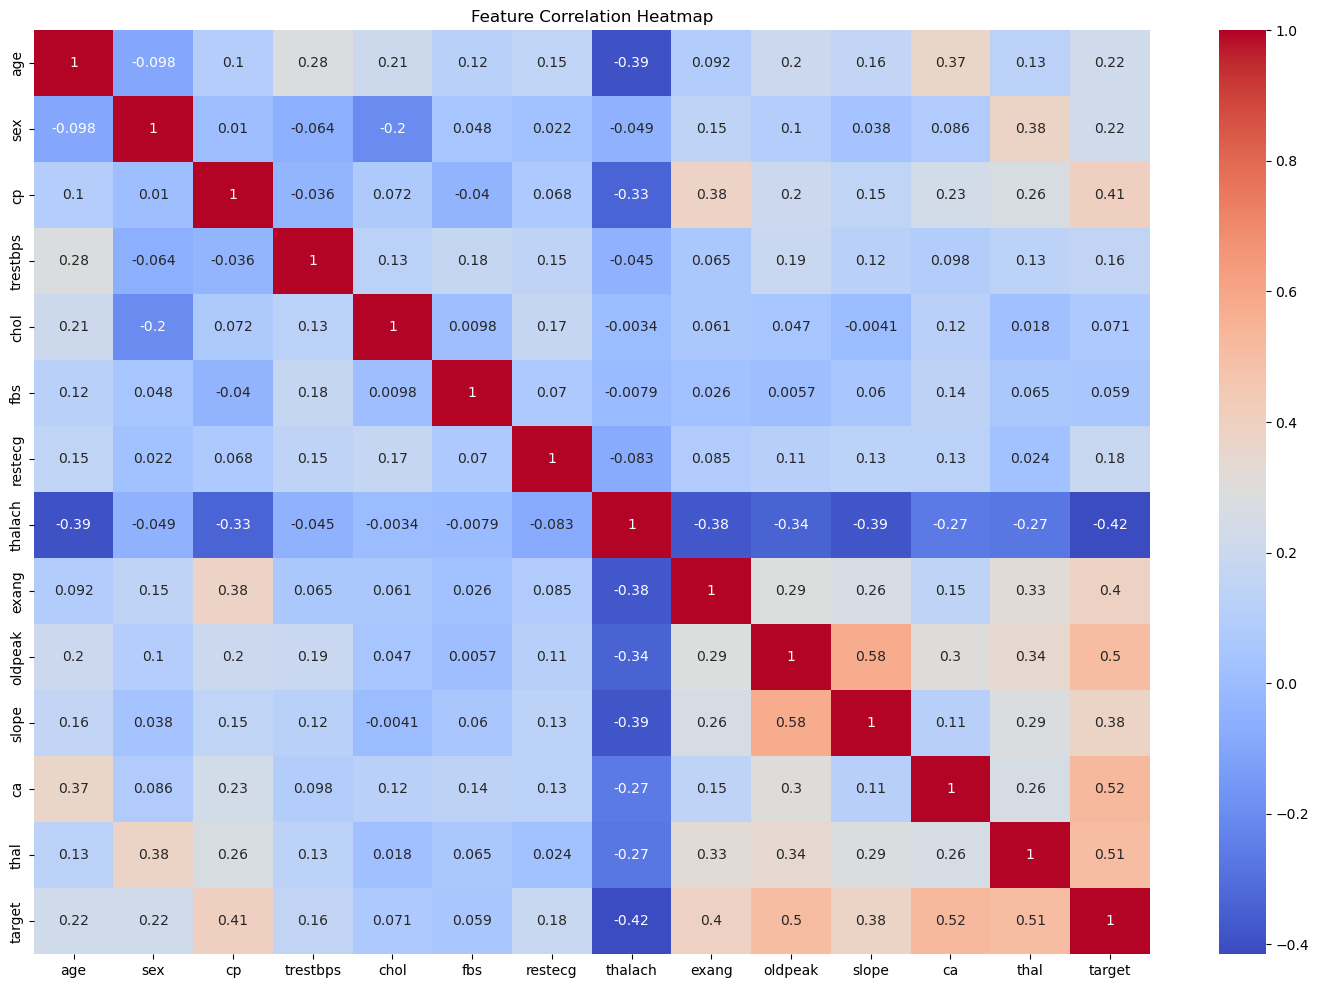

In [634]:
plt.figure(figsize=(18,12))
sns.heatmap(heart_df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

Before SMOTE:
target
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64


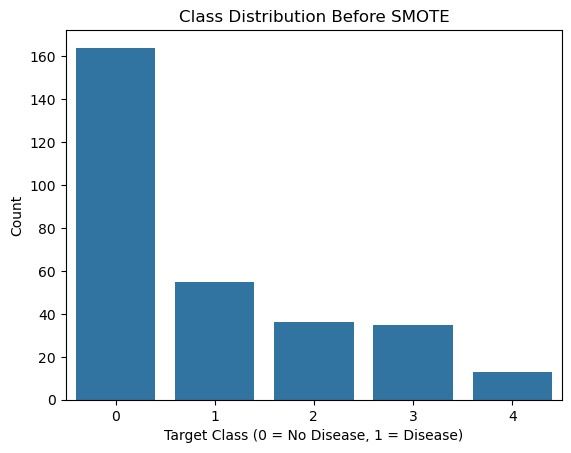

In [635]:
X = heart_df.drop('target', axis=1)
y = heart_df['target']

#Class distribution before SMOTE
print("Before SMOTE:")
print(y.value_counts())

sns.countplot(x=y)
plt.title("Class Distribution Before SMOTE")
plt.xlabel("Target Class (0 = No Disease, 1 = Disease)")
plt.ylabel("Count")
plt.show()



After SMOTE:
target
0    164
1    164
Name: count, dtype: int64


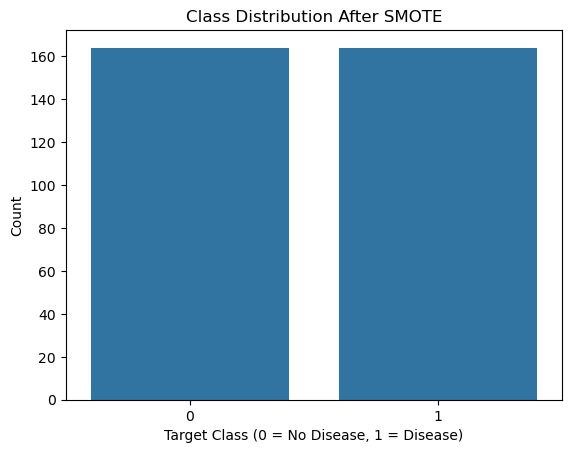

Class 0 count before: 164
Class 1 count before: 139
Class 0 count after: 164
Class 1 count after: 164


In [636]:

# One-Hot Encoding for categorical variables
heart_df = pd.get_dummies(heart_df, columns=['cp', 'restecg', 'slope', 'thal', 'sex'])


feature_columns = [col for col in heart_df.columns if col != 'target']
X = heart_df[feature_columns]  # Features
y = heart_df['target'].apply(lambda x: 1 if x > 0 else 0)


smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)
print("\nAfter SMOTE:")
print(y_balanced.value_counts())

sns.countplot(x=y_balanced)
plt.title("Class Distribution After SMOTE")
plt.xlabel("Target Class (0 = No Disease, 1 = Disease)")
plt.ylabel("Count")
plt.show()

print(f"Class 0 count before: {y.value_counts()[0]}")
print(f"Class 1 count before: {y.value_counts()[1]}")
print(f"Class 0 count after: {y_sm.value_counts()[0]}")
print(f"Class 1 count after: {y_sm.value_counts()[1]}")

In [637]:
heart_df.head()

,age,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_1.0,...,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0,sex_0.0,sex_1.0
0,63.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,0,True,...,False,True,False,False,True,False,True,False,False,True
1,67.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,2,False,...,False,True,False,True,False,True,False,False,False,True
2,67.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,1,False,...,False,True,False,True,False,False,False,True,False,True
3,37.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,False,...,False,False,False,False,True,True,False,False,False,True
4,41.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,False,...,False,True,True,False,False,True,False,False,True,False


In [638]:
#Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# scaler file
with open("scaler.pkl", "wb") as scaler_file:
    pickle.dump(scaler, scaler_file)

In [639]:
# Splitting the Data into Training & Test Sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced)

In [640]:
#Training
# Training the XGBoost Model with Better Hyperparameters
xgb_model = XGBClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="logloss"
)
xgb_model.fit(X_train_scaled, y_train)



,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [641]:
y_pred_xgb = xgb_model.predict(X_test_scaled)
print("\n🔍 XGBoost Model Performance:")
print(classification_report(y_test, y_pred_xgb))
print(f"📊 Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")


🔍 XGBoost Model Performance:
              precision    recall  f1-score   support

           0       0.88      0.85      0.86        33
           1       0.85      0.88      0.87        33

    accuracy                           0.86        66
   macro avg       0.86      0.86      0.86        66
weighted avg       0.86      0.86      0.86        66

📊 Accuracy: 0.8636


In [642]:
# trained model(pickel file)
with open("heart_disease_model.pkl", "wb") as model_file:
    pickle.dump(xgb_model, model_file)

print("\n✅ Model and scaler saved successfully!")


✅ Model and scaler saved successfully!


In [643]:
# Feature Importance Analysis
feature_importances = pd.DataFrame({"Feature": X.columns, "Importance": xgb_model.feature_importances_})
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

In [644]:
print("\n🔹 Top 10 Important Features:")
print(feature_importances.head(10))




🔹 Top 10 Important Features:
        Feature  Importance
11       cp_4.0    0.187867
20     thal_7.0    0.182960
7            ca    0.096690
21      sex_0.0    0.054100
16    slope_2.0    0.050805
18     thal_3.0    0.048921
22      sex_1.0    0.038099
14  restecg_2.0    0.034373
5         exang    0.031194
0           age    0.030094


In [645]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "CatBoost": CatBoostClassifier(iterations=200, verbose=0, random_state=42),
    "XgBoost" : XGBClassifier( n_estimators=200, max_depth=5, learning_rate=0.1,subsample=0.8,colsample_bytree=0.8,eval_metric="logloss")
        
}

In [646]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None
    results.append({
        "Model": name,
        "Accuracy": round(acc, 4),
        "AUC": round(auc, 4) if auc else "-",
        "Precision": round(classification_report(y_test, y_pred, output_dict=True)["1"]["precision"], 4),
        "Recall": round(classification_report(y_test, y_pred, output_dict=True)["1"]["recall"], 4),
        "F1-Score": round(classification_report(y_test, y_pred, output_dict=True)["1"]["f1-score"], 4)
    })


In [647]:
results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
display(results_df)


,Model,Accuracy,AUC,Precision,Recall,F1-Score
3,CatBoost,0.8788,0.9256,0.8788,0.8788,0.8788
1,Random Forest,0.8636,0.9261,0.8529,0.8788,0.8657
4,XgBoost,0.8636,0.8871,0.8529,0.8788,0.8657
0,Logistic Regression,0.8485,0.9421,0.8286,0.8788,0.8529
2,AdaBoost,0.8485,0.9385,0.8710,0.8182,0.8438


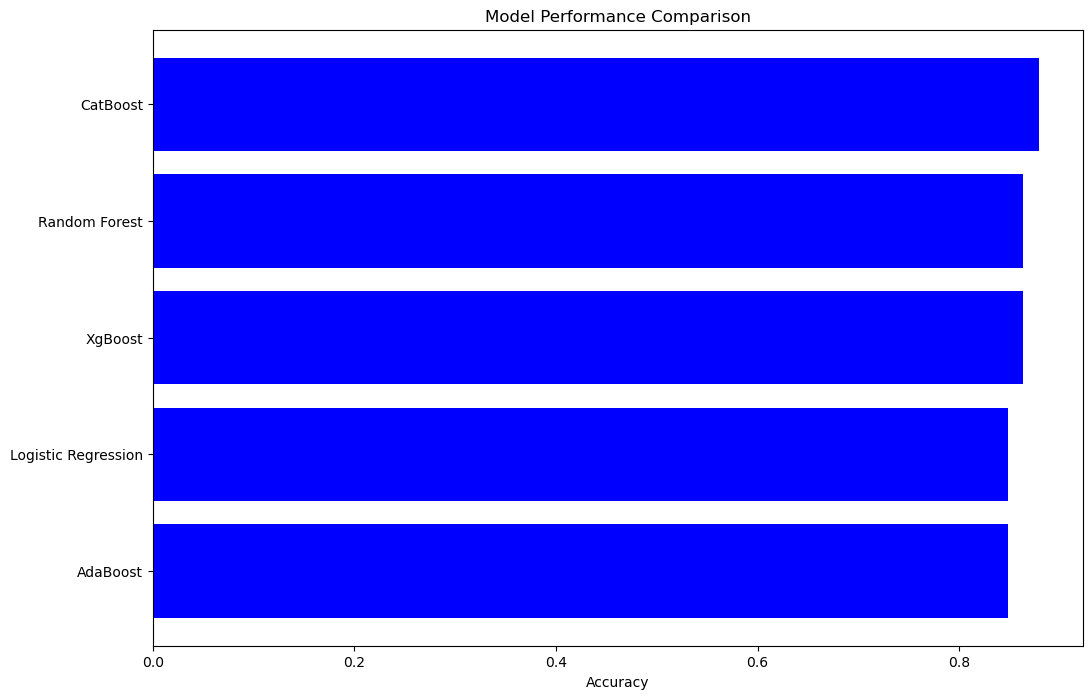

In [648]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.barh(results_df["Model"], results_df["Accuracy"], color='blue')
plt.xlabel("Accuracy")
plt.title("Model Performance Comparison")
plt.gca().invert_yaxis()
plt.show()
